# **2. DATA PROFILING**

Import libraries:

In [ ]:
!pip install sweetviz lux-api autoviz plotly matplotlib

In [3]:
import pandas as pd
import json
import seaborn as sns
import sweetviz as sv
import lux
from autoviz import AutoViz_Class
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


**DATA PROFILING**

Data profiling is the set of activities and processes designed to determine the metadata of a given dataset.

Data profiling helps understand and prepare data for subsequent cleaning, integration, and analysis.

Import data:

In [4]:
BEERS = pd.read_csv('https://raw.githubusercontent.com/camillasancricca/DATADIQ/master/BEERS.csv')

Basic profiling activities:

In [3]:
#look at data with the functions we have already seen in DQ ASSESSMENT
BEERS.columns

Index(['abv', 'ibu', 'id', 'name', 'style', 'brewery_id', 'ounces'], dtype='object')

In [ ]:
BEERS.shape

In [ ]:
BEERS.head()

In [ ]:
BEERS.dtypes

In [8]:
#display numeric columns
NUM = list(BEERS.select_dtypes(include=['int64','float64']).columns)
NUM

['abv', 'ibu', 'id', 'ounces']

In [9]:
#display categorical columns
CAT = list(BEERS.select_dtypes(include=['bool','object']).columns)
CAT

['name', 'style', 'brewery_id']

**SINGLE COLUMN ANALYSIS**

**Cardinalities**

Cardinalities are numbers that summarize simple metadata (*e.g.,* number of rows, attributes, null values, distinct values, Uniqueness and Distinctness).

*Cardinality* = count of the number of distinct actual values.

*Uniqueness* = percentage calculated as Cardinality divided by the total number of records.

*Actual* = count of the number of records with an actual value (*i.e.,* not-null).

*Distinctness* = percentage calculated as Cardinality divided by Actual.

In [ ]:
#len command counts the number of rows
ROWS = len(BEERS['ibu'])
ROWS

In [ ]:
#number of rows with shape function
BEERS.shape[0]

In [ ]:
#number of columns with shape function
BEERS.shape[1]

In [ ]:
#number of cells with shape function
CELLS = BEERS.shape[0]*BEERS.shape[1]
CELLS

In [15]:
#number of non—null observation in a column (attribute "ibu")
COUNT = BEERS['ibu'].count()
COUNT

np.int64(1412)

In [ ]:
#value counts is the same of a group by (attribute "ibu")
BEERS['ibu'].value_counts()

In [ ]:
#nunique is the number of distict values for an attribute (attribute "ibu")
DISTINCT = (BEERS['ibu'].nunique())
DISTINCT

UNIQUENESS EVALUATION:

In [ ]:
#for attribute "ibu"
UNIQUENESS = DISTINCT / ROWS
print("UNIQUENESS: ", UNIQUENESS)

DISTINCTNESS EVALUATION:

In [ ]:
#for attribute "ibu"
DISTINCTNESS = DISTINCT / COUNT
print("DISTINCTNESS: ", DISTINCTNESS)

**Value distributions**

Value distributions summarize the distribution of values within a column (*e.g.,* extremes and Constancy). A common representation for value distributions are Histograms.

*Constancy* = frequency of the most frequent value divided by the total number of values. It might reveals the presence of standard values.

In [6]:
#extremes (attribute "abv")
print ('MIN:', BEERS['abv'].min())
print ('MAX:', BEERS['abv'].max())
print ('MODE:', BEERS['abv'].mode()[0])

MIN: 0.027
MAX: 128.0
MODE: 0.05


In [10]:
#extremes (all attributes)
print ('MIN: ', BEERS[NUM].min())
print("\n\n")
print ('MAX: ', BEERS[NUM].max())

MIN:  abv       0.027
ibu       4.000
id        1.000
ounces    8.400
dtype: float64



MAX:  abv        128.0
ibu        138.0
id        2692.0
ounces     308.0
dtype: float64


In [11]:
#other information: Mean and Standard deviation
print('Average:', BEERS['ibu'].mean())
print('Standard Deviation:', BEERS['ibu'].std())

Average: 42.72025495750708
Standard Deviation: 25.90727209665032


In [12]:
#find max of value counts (attribute "ibu")
MAX_COUNTS = max(BEERS['ibu'].value_counts())
MAX_COUNTS

82

CONSTANCY EVALUATION:

In [16]:
#for attribute "ibu"
CONSTANCY = MAX_COUNTS / COUNT
print("CONSTANCY: ", CONSTANCY)

CONSTANCY:  0.05807365439093484


**Histograms** are often used to fit distributions to the data. Analysts can check if the values of some columns are (approximately) normally distributed, and the number of outliers may be returned.


<Axes: >

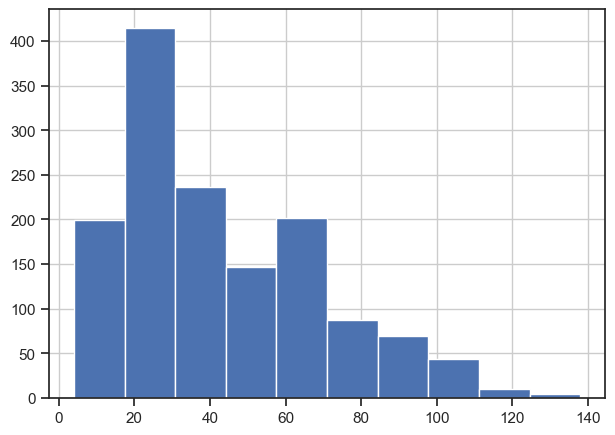

In [17]:
#plot the distribution of the attribute "ibu" with hist function
BEERS['ibu'].hist()

In [18]:
#describe function get different properties for all the numerical attributes of the table
BEERS.describe()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

array([[<Axes: title={'center': 'ibu'}>, <Axes: title={'center': 'abv'}>]],
      dtype=object)

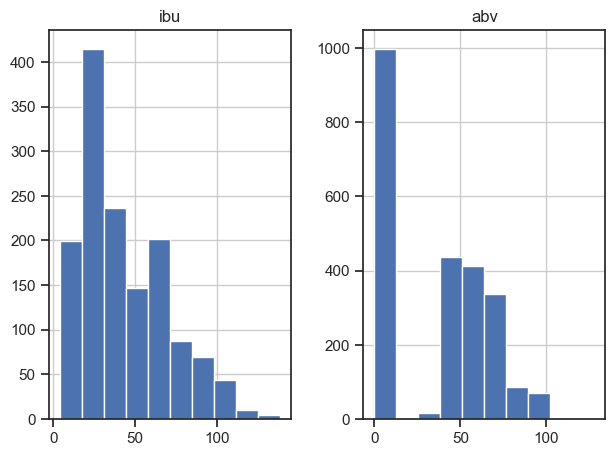

In [19]:
#we can also display multiple histograms
BEERS[['ibu','abv']].hist()

In [20]:
#correlation evaluation base on pearson correlation coefficient
BEERS[NUM].corr(method='pearson')

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [21]:
#correlation evaluation base on kendall correlation coefficient
BEERS[NUM].corr(method ='kendall')

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [22]:
#correlation evaluation base on spearman correlation coefficient
corr = BEERS[NUM].corr(method ='spearman')

<Axes: >

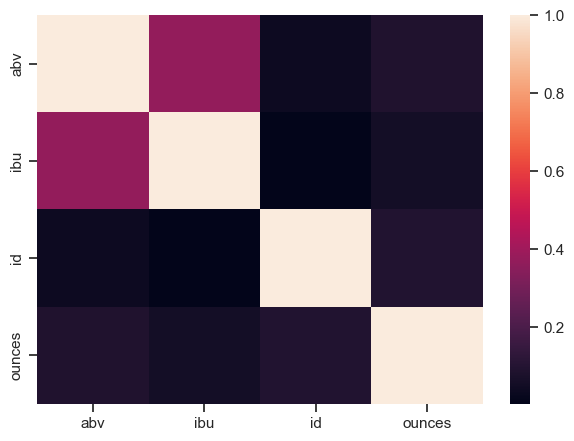

In [23]:
#correlation evaluation heatmap
sns.heatmap(corr)

**SWEETVIZ LIBRARY** (alternative library for data profiling)

                                             |          | [  0%]   00:00 -> (? left)

AttributeError: module 'numpy' has no attribute 'VisibleDeprecationWarning'

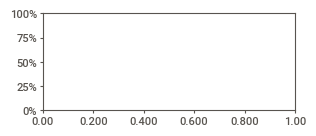

In [24]:
sweet_report = sv.analyze([BEERS,'Sweetviz Report'])
sweet_report.show_notebook()

**LUX LIBRARY** (alternative library for correlation discovery)

In [ ]:
BEERS.default_display = "lux"

In [ ]:
BEERS

**MATPLOTLIB** (very useful library for data visualization)

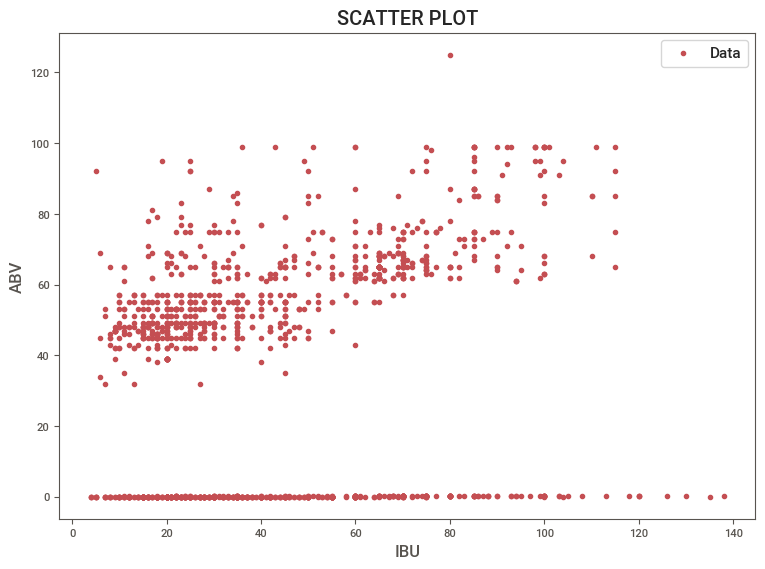

In [25]:
plt.figure(figsize=(8, 6))
plt.scatter(BEERS["ibu"], BEERS["abv"], marker='o', color='r', label='Data')
plt.xlabel('IBU')
plt.ylabel('ABV')
plt.title('SCATTER PLOT')
plt.legend()
plt.grid(False)
plt.show()

**PLOTLY** (very useful library for **interactive** data visualization)

In [26]:
df = px.data.iris()
fig = px.scatter_matrix(df,
    dimensions=["sepal_length", "sepal_width", "petal_length", "petal_width"],
    color="species")
fig.show()

In [ ]:
df = px.data.tips()
fig = px.box(df, x="time", y="total_bill")
fig.show()

In [ ]:
fig = px.box(df, x="time", y="total_bill", points="all")
fig.show()

**Summary:**

*Basic profiling activities*
- pandas.read_csv()
- DataFrame.columns()
- DataFrame.shape()
- DataFrame.head()
- DataFrame.dtypes()
- DataFrame.select_dtypes()

*Single column analysis*
- len()
- DataFrame.count()
- DataFrame.value_counts()
- DataFrame.nunique()
- DataFrame.min(), DataFrame.max(), DataFrame.mean(), DataFrame.std(), DataFrame.mode()

*Histograms*
- DataFrame.describe()
- DataFrame.dropna()
- DataFrame.hist()
- DataFrame.corr()